<a href="https://colab.research.google.com/github/skdding3/LOL-Project/blob/main/LOL_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOL Data Analysis Visualization Service**

기존 전적검색 서비스에서 게임 매칭시 기존 서비스와 차별화를 두는 

한번에 같은 팀에 대한 실력을 가늠할 수 있는 시각적인 컨텐츠를 제시.

In [ ]:
import pandas as pd # 기존 api에서 가져온 데이터에서 지표에 필요하다 생각하는 칼럼을 따로 가져온다.
df = pd.read_csv('/content/participants_final2.csv')
df1 = df.set_index(['gameid','teamid'])

df1['totalkills'] = df1.groupby(['gameid','teamid'])['stats.kills'].sum()
df1 = df1.iloc[:10]

df1['dps'] = df1['stats.totaldamagedealttochampions']/df1['gameduration']

### 5가지 대표적인 지표를 설립하여 제공.

## **Viabillity (생존성)**

In [ ]:
viability = df1[['position','stats.deaths','stats.visionscore','stats.wardsplaced','stats.kills']]

weight_viability = viability.copy()
weight_viability = weight_viability.reset_index(drop=False, inplace=False)

weight_viability.rename(columns = {'stats.deaths' : 'death','stats.visionscore' :'visionscore','stats.wardsplaced': 'wards_placed','stats.kills':'kills'}, inplace = True)

weight_viability

,gameid,teamid,position,death,visionscore,wards_placed,kills
0,4621713273,100,MID,3,20,9,6
1,4621713273,100,SUPPORT,2,34,11,10
2,4621713273,100,TOP,3,14,10,4
3,4621713273,100,JUNGLE,4,55,24,1
4,4621713273,100,ADC,3,14,9,5
5,4621713273,200,TOP,7,24,5,2
6,4621713273,200,JUNGLE,3,21,7,5
7,4621713273,200,MID,3,16,9,1
8,4621713273,200,SUPPORT,8,13,6,6
9,4621713273,200,ADC,5,66,28,1


In [ ]:
weight_viability = viability.copy()
weight_viability = weight_viability.reset_index(drop=False, inplace=False)

weight_viability.rename(columns = {'stats.deaths' : 'death','stats.visionscore' :'visionscore','stats.wardsplaced': 'wards_placed','stats.kills':'kills'}, inplace = True)

weight_viability

weight_viability = weight_viability.astype({'death':float}).astype({'visionscore':float}).astype({'wards_placed':float}).astype({'kills':float})
weight_viability

for i in range(0, 10) :
    if weight_viability['position'][i] == 'MID' :
      weight_viability['death'][i] = weight_viability['death'][i] * 0.3
      weight_viability['visionscore'][i] = weight_viability['visionscore'][i] * 0.15
      weight_viability['wards_placed'][i] = weight_viability['wards_placed'][i] * 0.15
      weight_viability['kills'][i] = weight_viability['kills'][i] * 0.4
    elif weight_viability['position'][i] == 'SUPPORT' :
      weight_viability['death'][i] = weight_viability['death'][i] * 0.3
      weight_viability['visionscore'][i] = weight_viability['visionscore'][i] * 0.2
      weight_viability['wards_placed'][i] = weight_viability['wards_placed'][i] * 0.2
      weight_viability['kills'][i] = weight_viability['kills'][i] * 0.3
    elif weight_viability['position'][i] == 'TOP' :
      weight_viability['death'][i] = weight_viability['death'][i] * 0.3
      weight_viability['visionscore'][i] = weight_viability['visionscore'][i] * 0.15
      weight_viability['wards_placed'][i] = weight_viability['wards_placed'][i] * 0.15
      weight_viability['kills'][i] = weight_viability['kills'][i] * 0.4
    elif weight_viability['position'][i] == 'JUNGLE' :
      weight_viability['death'][i] = weight_viability['death'][i] * 0.25
      weight_viability['visionscore'][i] = weight_viability['visionscore'][i] * 0.2
      weight_viability['wards_placed'][i] = weight_viability['wards_placed'][i] * 0.2
      weight_viability['kills'][i] = weight_viability['kills'][i] * 0.35
    else :
      weight_viability['death'][i] = weight_viability['death'][i] * 0.35
      weight_viability['visionscore'][i] = weight_viability['visionscore'][i] * 0.15
      weight_viability['wards_placed'][i] = weight_viability['wards_placed'][i] * 0.15
      weight_viability['kills'][i] = weight_viability['kills'][i] * 0.35

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_l

In [ ]:
weight_viability

,gameid,teamid,position,death,visionscore,wards_placed,kills
0,4621713273,100,MID,0.90,3.0,1.35,2.40
1,4621713273,100,SUPPORT,0.60,6.8,2.20,3.00
2,4621713273,100,TOP,0.90,2.1,1.50,1.60
3,4621713273,100,JUNGLE,1.00,11.0,4.80,0.35
4,4621713273,100,ADC,1.05,2.1,1.35,1.75
5,4621713273,200,TOP,2.10,3.6,0.75,0.80
6,4621713273,200,JUNGLE,0.75,4.2,1.40,1.75
7,4621713273,200,MID,0.90,2.4,1.35,0.40
8,4621713273,200,SUPPORT,2.40,2.6,1.20,1.80
9,4621713273,200,ADC,1.75,9.9,4.20,0.35


In [ ]:
# 경기 시간 분으로 환산 
time = round(df['gameduration'] / 60, 2)
# time

# 생존력 관련 변수들을 분당 백분율로 전처리 

min_viability = weight_viability.iloc[:,3:] /time[0]
min_viability = pd.concat([weight_viability[['teamid','position']], min_viability], axis=1)

# min_viability 

# 유저별(개인별) 생존력 계산 : total_viability
min_viability['total_viability'] = min_viability.iloc[:,1:].sum(axis=1)
min_viability

,teamid,position,death,visionscore,wards_placed,kills,total_viability
0,100,MID,0.035672,0.118906,0.053508,0.095125,0.303210
1,100,SUPPORT,0.023781,0.269520,0.087198,0.118906,0.499405
2,100,TOP,0.035672,0.083234,0.059453,0.063417,0.241776
3,100,JUNGLE,0.039635,0.435989,0.190250,0.013872,0.679746
4,100,ADC,0.041617,0.083234,0.053508,0.069362,0.247721
5,200,TOP,0.083234,0.142687,0.029727,0.031708,0.287356
6,200,JUNGLE,0.029727,0.166468,0.055489,0.069362,0.321046
7,200,MID,0.035672,0.095125,0.053508,0.015854,0.200159
8,200,SUPPORT,0.095125,0.103052,0.047562,0.071344,0.317083
9,200,ADC,0.069362,0.392390,0.166468,0.013872,0.642093


In [ ]:
# 1게임 -  팀별 생존력 
min_viability['total_viability'][:5].mean() # team_id == 100 의 평균 생존력 

0.39437177962742764

In [ ]:
min_viability['total_viability'][5:].mean() # team_id == 200 의 평균 생존력 

0.35354736424891003

## **aggression (공격성)**

In [ ]:
aggression = df1[['position','stats.totaldamagedealttochampions','stats.neutralminionskilledteamjungle','stats.neutralminionskilledenemyjungle','stats.kills','dps']]
aggression

position  ...        dps
gameid     teamid           ...           
4621713273 100         MID  ...   7.482166
           100     SUPPORT  ...   7.818362
           100         TOP  ...   7.206737
           100      JUNGLE  ...   2.672391
           100         ADC  ...  14.538309
           200         TOP  ...   3.704756
           200      JUNGLE  ...   6.846103
           200         MID  ...   6.697490
           200     SUPPORT  ...   9.817041
           200         ADC  ...   4.298547

[10 rows x 6 columns]

In [ ]:
weight_aggression = aggression.reset_index(drop=False, inplace=False)
weight_aggression.rename(columns = {'stats.totaldamagedealttochampions' : 'damage_dealt','stats.neutralminionskilledteamjungle' : 'cs_killed_tjg',    'stats.neutralminionskilledenemyjungle': 'cs_killed_ejg',    'stats.goldearned': 'gold_earned',    'stats.kills':'kills'}, inplace = True)

for i in range(0, 10) :
    if weight_aggression['position'][i] == 'TOP' :
      weight_aggression['damage_dealt'][i] = weight_aggression['damage_dealt'][i] * 0.4
      weight_aggression['cs_killed_tjg'][i] = weight_aggression['cs_killed_tjg'][i] * 0.05
      weight_aggression['cs_killed_ejg'][i] = weight_aggression['cs_killed_ejg'][i] * 0.05
      weight_aggression['kills'][i] = weight_aggression['kills'][i] * 0.35
      weight_aggression['dps'][i] = weight_aggression['dps'][i] * 0.15
    elif weight_aggression['position'][i] == 'JUNGLE' :
      weight_aggression['damage_dealt'][i] = weight_aggression['damage_dealt'][i] * 0.25
      weight_aggression['cs_killed_tjg'][i] = weight_aggression['cs_killed_tjg'][i] * 0.15
      weight_aggression['cs_killed_ejg'][i] = weight_aggression['cs_killed_ejg'][i] * 0.15
      weight_aggression['kills'][i] = weight_aggression['kills'][i] * 0.35
      weight_aggression['dps'][i] = weight_aggression['dps'][i] * 0.1
    elif weight_aggression['position'][i] == 'MID' :
      weight_aggression['damage_dealt'][i] = weight_aggression['damage_dealt'][i] * 0.4
      weight_aggression['cs_killed_tjg'][i] = weight_aggression['cs_killed_tjg'][i] * 0.05
      weight_aggression['cs_killed_ejg'][i] = weight_aggression['cs_killed_ejg'][i] * 0.05
      weight_aggression['kills'][i] = weight_aggression['kills'][i] * 0.35
      weight_aggression['dps'][i] = weight_aggression['dps'][i] * 0.15
    elif weight_aggression['position'][i] == 'ADC' :
      weight_aggression['damage_dealt'][i] = weight_aggression['damage_dealt'][i] * 0.45
      weight_aggression['cs_killed_tjg'][i] = weight_aggression['cs_killed_tjg'][i] * 0.05
      weight_aggression['cs_killed_ejg'][i] = weight_aggression['cs_killed_ejg'][i] * 0.05
      weight_aggression['kills'][i] = weight_aggression['kills'][i] * 0.3
      weight_aggression['dps'][i] = weight_aggression['dps'][i] * 0.15
    else :
      weight_aggression['damage_dealt'][i] = weight_aggression['damage_dealt'][i] * 0.45
      weight_aggression['cs_killed_tjg'][i] = weight_aggression['cs_killed_tjg'][i] * 0.05
      weight_aggression['cs_killed_ejg'][i] = weight_aggression['cs_killed_ejg'][i] * 0.05
      weight_aggression['kills'][i] = weight_aggression['kills'][i] * 0.35
      weight_aggression['dps'][i] = weight_aggression['dps'][i] * 0.10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
11328	* 0.4

4531.2

In [ ]:
weight_aggression

,gameid,teamid,position,damage_dealt,cs_killed_tjg,cs_killed_ejg,kills,dps
0,4621713273,100,MID,4531,0,0,2,1.122325
1,4621713273,100,SUPPORT,5326,4,0,3,0.781836
2,4621713273,100,TOP,4364,0,0,1,1.081011
3,4621713273,100,JUNGLE,1011,0,0,0,0.267239
4,4621713273,100,ADC,9904,0,0,1,2.180746
5,4621713273,200,TOP,2243,4,0,0,0.555713
6,4621713273,200,JUNGLE,2591,1,1,1,0.684610
7,4621713273,200,MID,4056,0,0,0,1.004624
8,4621713273,200,SUPPORT,6688,0,0,2,0.981704
9,4621713273,200,ADC,2928,0,0,0,0.644782


In [ ]:
weight_aggression['total_aggression'] = weight_aggression.iloc[:,3:].sum(axis=1)

In [ ]:
A_total_weight_aggression = weight_aggression['total_aggression'][:5].sum() 

B_total_weight_aggression = weight_aggression['total_aggression'][5:].sum() 

In [ ]:
weight_aggression['aggression_percent'] = weight_aggression['total_aggression'][:5]/A_total_weight_aggression

In [ ]:
weight_aggression['aggression_percent'][5:] = weight_aggression['total_aggression'][5:]/B_total_weight_aggression

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
weight_aggression

,gameid,teamid,position,damage_dealt,cs_killed_tjg,cs_killed_ejg,kills,dps,total_aggression,aggression_percent
0,4621713273,100,MID,4531,0,0,2,1.122325,4534.122325,0.180266
1,4621713273,100,SUPPORT,5326,4,0,3,0.781836,5333.781836,0.212058
2,4621713273,100,TOP,4364,0,0,1,1.081011,4366.081011,0.173585
3,4621713273,100,JUNGLE,1011,0,0,0,0.267239,1011.267239,0.040206
4,4621713273,100,ADC,9904,0,0,1,2.180746,9907.180746,0.393886
5,4621713273,200,TOP,2243,4,0,0,0.555713,2247.555713,0.121366
6,4621713273,200,JUNGLE,2591,1,1,1,0.684610,2594.684610,0.140110
7,4621713273,200,MID,4056,0,0,0,1.004624,4057.004624,0.219074
8,4621713273,200,SUPPORT,6688,0,0,2,0.981704,6690.981704,0.361306
9,4621713273,200,ADC,2928,0,0,0,0.644782,2928.644782,0.158144


## **Tanking (탱킹)**

In [ ]:
tanking = df1[['position','stats.deaths','stats.totaldamagetaken']]
tanking

position  stats.deaths  stats.totaldamagetaken
gameid     teamid                                               
4621713273 100         MID             3                   15655
           100     SUPPORT             2                   13701
           100         TOP             3                    7374
           100      JUNGLE             4                   12376
           100         ADC             3                   20747
           200         TOP             7                   19135
           200      JUNGLE             3                   14082
           200         MID             3                   22200
           200     SUPPORT             8                   17182
           200         ADC             5                    9637

In [ ]:
weight_tanking = tanking.reset_index(drop=False, inplace=False)
weight_tanking.rename(columns = {'stats.totaldamagetaken' : 'damage_taken', 'stats.deaths' : 'deaths'}, inplace = True)
weight_tanking['efficiency'] = 1
for i in range(0, 10) :
    if weight_tanking['position'][i] == 'TOP' :
      weight_tanking['damage_taken'][i] = weight_tanking['damage_taken'][i]
      weight_tanking['deaths'][i] = weight_tanking['deaths'][i] * 0.3
    elif weight_tanking['position'][i] == 'JUNGLE' :
      weight_tanking['damage_taken'][i] = weight_tanking['damage_taken'][i]
      weight_tanking['deaths'][i] = weight_tanking['deaths'][i] * 0.25 
    elif weight_tanking['position'][i] == 'MID' :
      weight_tanking['damage_taken'][i] = weight_tanking['damage_taken'][i]
      weight_tanking['deaths'][i] = weight_tanking['deaths'][i] * 0.3 
    elif weight_tanking['position'][i] == 'ADC' :
      weight_tanking['damage_taken'][i] = weight_tanking['damage_taken'][i]
      weight_tanking['deaths'][i] = weight_tanking['deaths'][i] * 0.35
    else :
      weight_tanking['damage_taken'][i] = weight_tanking['damage_taken'][i]
      weight_tanking['deaths'][i] = weight_tanking['deaths'][i] * 0.3 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: Setti

In [ ]:
for i in range(0, 10) :
  if weight_tanking['deaths'][i] == 0:
    weight_tanking['efficiency'][i] = (weight_tanking['damage_taken'][i]*1.2)/(weight_tanking['deaths'][i]+1)
  else :
    weight_tanking['efficiency'][i] = weight_tanking['damage_taken'][i]/weight_tanking['deaths'][i]
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
weight_tanking

,gameid,teamid,position,deaths,damage_taken,efficiency
0,4621713273,100,MID,0,15655,18786
1,4621713273,100,SUPPORT,0,13701,16441
2,4621713273,100,TOP,0,7374,8848
3,4621713273,100,JUNGLE,1,12376,12376
4,4621713273,100,ADC,1,20747,20747
5,4621713273,200,TOP,2,19135,9567
6,4621713273,200,JUNGLE,0,14082,16898
7,4621713273,200,MID,0,22200,26640
8,4621713273,200,SUPPORT,2,17182,8591
9,4621713273,200,ADC,1,9637,9637


In [ ]:
weight_tanking['total_tanking'] = weight_tanking.iloc[:,3:6].sum(axis=1)
# weight_tanking

A_total_tanking = weight_tanking['total_tanking'][:5].sum() 
# A_total_tanking
B_total_tanking = weight_tanking['total_tanking'][5:].sum() 
# B_total_tanking

weight_tanking['tanking_percent'] = weight_tanking['total_tanking'][:5]/A_total_tanking
weight_tanking['tanking_percent'][5:]  = weight_tanking['total_tanking'][5:]/B_total_tanking
weight_tanking

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,gameid,teamid,position,deaths,damage_taken,efficiency,total_tanking,tanking_percent
0,4621713273,100,MID,0,15655,18786,34441,0.234208
1,4621713273,100,SUPPORT,0,13701,16441,30142,0.204974
2,4621713273,100,TOP,0,7374,8848,16222,0.110314
3,4621713273,100,JUNGLE,1,12376,12376,24753,0.168327
4,4621713273,100,ADC,1,20747,20747,41495,0.282177
5,4621713273,200,TOP,2,19135,9567,28704,0.186907
6,4621713273,200,JUNGLE,0,14082,16898,30980,0.201727
7,4621713273,200,MID,0,22200,26640,48840,0.318023
8,4621713273,200,SUPPORT,2,17182,8591,25775,0.167834
9,4621713273,200,ADC,1,9637,9637,19275,0.125510


## **Gold Earned (골드 수급)**

In [ ]:
golds_earned = df1[['position','stats.neutralminionskilledteamjungle','stats.neutralminionskilledenemyjungle','stats.goldearned']]
golds_earned

position  ...  stats.goldearned
gameid     teamid           ...                  
4621713273 100         MID  ...             11911
           100     SUPPORT  ...             11674
           100         TOP  ...              9933
           100      JUNGLE  ...              6503
           100         ADC  ...             11234
           200         TOP  ...              7416
           200      JUNGLE  ...             11415
           200         MID  ...              8337
           200     SUPPORT  ...             11826
           200         ADC  ...              6350

[10 rows x 4 columns]

In [ ]:
weight_gold = golds_earned.reset_index(drop=False, inplace=False)
weight_gold.rename(columns = {'stats.neutralminionskilledteamjungle' : 'cs_killed_tjg',    'stats.neutralminionskilledenemyjungle': 'cs_killed_ejg',    'stats.goldearned': 'gold_earned'}, inplace = True)

for i in range(0, 10) :
    if weight_gold['position'][i] == 'TOP' :
      weight_gold['cs_killed_tjg'][i] = weight_gold['cs_killed_tjg'][i] * 0.2
      weight_gold['cs_killed_ejg'][i] = weight_gold['cs_killed_ejg'][i] * 0.2
      weight_gold['gold_earned'][i] = weight_gold['gold_earned'][i] * 0.6

    elif weight_gold['position'][i] == 'JUNGLE' :
      weight_gold['cs_killed_tjg'][i] = weight_gold['cs_killed_tjg'][i] * 0.3
      weight_gold['cs_killed_ejg'][i] = weight_gold['cs_killed_ejg'][i] * 0.3
      weight_gold['gold_earned'][i] = weight_gold['gold_earned'][i] * 0.4
          
    elif weight_gold['position'][i] == 'MID' :
      weight_gold['cs_killed_tjg'][i] = weight_gold['cs_killed_tjg'][i] * 0.2
      weight_gold['cs_killed_ejg'][i] = weight_gold['cs_killed_ejg'][i] * 0.2
      weight_gold['gold_earned'][i] = weight_gold['gold_earned'][i] * 0.6
           
    elif weight_gold['position'][i] == 'ADC' :
      weight_gold['cs_killed_tjg'][i] = weight_gold['cs_killed_tjg'][i] * 0.20
      weight_gold['cs_killed_ejg'][i] = weight_gold['cs_killed_ejg'][i] * 0.2
      weight_gold['gold_earned'][i] = weight_gold['gold_earned'][i] * 0.6
           
    else :
      weight_gold['cs_killed_tjg'][i] = weight_gold['cs_killed_tjg'][i] * 0.15
      weight_gold['cs_killed_ejg'][i] = weight_gold['cs_killed_ejg'][i] * 0.15
      weight_gold['gold_earned'][i] = weight_gold['gold_earned'][i] * 0.7
      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarn

In [ ]:
weight_gold

,gameid,teamid,position,cs_killed_tjg,cs_killed_ejg,gold_earned
0,4621713273,100,MID,1,1,7146
1,4621713273,100,SUPPORT,12,0,8171
2,4621713273,100,TOP,0,0,5959
3,4621713273,100,JUNGLE,0,0,2601
4,4621713273,100,ADC,2,0,6740
5,4621713273,200,TOP,17,0,4449
6,4621713273,200,JUNGLE,2,2,4566
7,4621713273,200,MID,0,0,5002
8,4621713273,200,SUPPORT,1,0,8278
9,4621713273,200,ADC,0,0,3810


In [ ]:
weight_gold['total_golds'] = weight_gold.iloc[:,1:4].sum(axis=1)
# weight_gold

A_total_golds = weight_gold['total_golds'][:5].sum() 
# A_total_golds
B_total_golds = weight_gold['total_golds'][5:].sum() 
# B_total_golds

weight_gold['golds_percent'] = weight_gold['total_golds'][:5]/A_total_golds
weight_gold['golds_percent'][5:]  = weight_gold['total_golds'][5:]/B_total_golds
weight_gold

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,gameid,teamid,position,cs_killed_tjg,cs_killed_ejg,gold_earned,total_golds,golds_percent
0,4621713273,100,MID,1,1,7146,101,0.196117
1,4621713273,100,SUPPORT,12,0,8171,112,0.217476
2,4621713273,100,TOP,0,0,5959,100,0.194175
3,4621713273,100,JUNGLE,0,0,2601,100,0.194175
4,4621713273,100,ADC,2,0,6740,102,0.198058
5,4621713273,200,TOP,17,0,4449,217,0.212745
6,4621713273,200,JUNGLE,2,2,4566,202,0.198039
7,4621713273,200,MID,0,0,5002,200,0.196078
8,4621713273,200,SUPPORT,1,0,8278,201,0.197059
9,4621713273,200,ADC,0,0,3810,200,0.196078


## **Supporting(서포팅)**

In [ ]:
supporting = df1[['position','stats.visionwardsboughtingame','stats.wardskilled','stats.wardsplaced','stats.visionscore']]
supporting

position  ...  stats.visionscore
gameid     teamid           ...                   
4621713273 100         MID  ...                 20
           100     SUPPORT  ...                 34
           100         TOP  ...                 14
           100      JUNGLE  ...                 55
           100         ADC  ...                 14
           200         TOP  ...                 24
           200      JUNGLE  ...                 21
           200         MID  ...                 16
           200     SUPPORT  ...                 13
           200         ADC  ...                 66

[10 rows x 5 columns]

In [ ]:
weight_supporting = supporting.reset_index(drop=False, inplace=False)
weight_supporting.rename(columns = {'stats.visionwardsboughtingame' : 'buy_ward'}, inplace = True)
weight_supporting.rename(columns = {'stats.wardsplaced' : 'place_ward'}, inplace = True)
weight_supporting.rename(columns = {'stats.wardskilled' : 'kill_ward'}, inplace = True)
weight_supporting.rename(columns = {'stats.visionscore' : 'visionscore'}, inplace = True)
weight_supporting

for i in range(0, 10) :
    if weight_supporting['position'][i] == 'TOP' :
      weight_supporting['buy_ward'][i] = weight_supporting['buy_ward'][i] * 0.2
      weight_supporting['place_ward'][i] = weight_supporting['place_ward'][i] * 0.15
      weight_supporting['kill_ward'][i] = weight_supporting['kill_ward'][i] * 0.3
      weight_supporting['visionscore'][i] = weight_supporting['visionscore'][i] * 0.35
     
    elif weight_supporting['position'][i] == 'JUNGLE' :
      weight_supporting['buy_ward'][i] = weight_supporting['buy_ward'][i] * 0.15
      weight_supporting['place_ward'][i] = weight_supporting['place_ward'][i] * 0.25
      weight_supporting['kill_ward'][i] = weight_supporting['kill_ward'][i] * 0.35
      weight_supporting['visionscore'][i] = weight_supporting['visionscore'][i] * 0.25
    
    elif weight_supporting['position'][i] == 'MID' :
      weight_supporting['buy_ward'][i] = weight_supporting['buy_ward'][i] * 0.20
      weight_supporting['place_ward'][i] = weight_supporting['place_ward'][i] * 0.15
      weight_supporting['kill_ward'][i] = weight_supporting['kill_ward'][i] * 0.30
      weight_supporting['visionscore'][i] = weight_supporting['visionscore'][i] * 0.35
     
    elif weight_supporting['position'][i] == 'ADC' :
      weight_supporting['buy_ward'][i] = weight_supporting['buy_ward'][i] * 0.20
      weight_supporting['place_ward'][i] = weight_supporting['place_ward'][i] * 0.15
      weight_supporting['kill_ward'][i] = weight_supporting['kill_ward'][i] * 0.30
      weight_supporting['visionscore'][i] = weight_supporting['visionscore'][i] * 0.35
     
    else :
      weight_supporting['buy_ward'][i] = weight_supporting['buy_ward'][i] * 0.15
      weight_supporting['place_ward'][i] = weight_supporting['place_ward'][i] * 0.20
      weight_supporting['kill_ward'][i] = weight_supporting['kill_ward'][i] * 0.25
      weight_supporting['visionscore'][i] = weight_supporting['visionscore'][i] * 0.40

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
weight_supporting

,gameid,teamid,position,buy_ward,kill_ward,place_ward,visionscore
0,4621713273,100,MID,0,1,1,7
1,4621713273,100,SUPPORT,0,1,2,13
2,4621713273,100,TOP,0,0,1,4
3,4621713273,100,JUNGLE,1,3,6,13
4,4621713273,100,ADC,0,0,1,4
5,4621713273,200,TOP,0,1,0,8
6,4621713273,200,JUNGLE,0,2,1,5
7,4621713273,200,MID,0,0,1,5
8,4621713273,200,SUPPORT,0,0,1,5
9,4621713273,200,ADC,1,3,4,23


In [ ]:
weight_supporting['total_supporting'] = weight_supporting.iloc[:,3:].sum(axis=1)
# weight_supporting

A_total_supporting = weight_supporting['total_supporting'][:5].sum() 
# A_total_supporting
B_total_supporting = weight_supporting['total_supporting'][5:].sum() 
# B_total_supporting

weight_supporting['supporting_percent'] = weight_supporting['total_supporting'][:5]/A_total_supporting
weight_supporting['supporting_percent'][5:]  = weight_supporting['total_supporting'][5:]/B_total_supporting
weight_supporting

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,gameid,teamid,position,buy_ward,kill_ward,place_ward,visionscore,total_supporting,supporting_percent
0,4621713273,100,MID,0,1,1,7,9,0.155172
1,4621713273,100,SUPPORT,0,1,2,13,16,0.275862
2,4621713273,100,TOP,0,0,1,4,5,0.086207
3,4621713273,100,JUNGLE,1,3,6,13,23,0.396552
4,4621713273,100,ADC,0,0,1,4,5,0.086207
5,4621713273,200,TOP,0,1,0,8,9,0.150000
6,4621713273,200,JUNGLE,0,2,1,5,8,0.133333
7,4621713273,200,MID,0,0,1,5,6,0.100000
8,4621713273,200,SUPPORT,0,0,1,5,6,0.100000
9,4621713273,200,ADC,1,3,4,23,31,0.516667


In [ ]:
weight_supporting['supporting_percent'][:5].sum() # 각 팀별(100) 유저의 서포팅 확률의 합 1 확인 

1.0

In [ ]:
weight_supporting['supporting_percent'][5:].sum() # 각 팀별(200) 유저의 서포팅 확률의 합 1 확인 

1.0

## 시각화 적용 (Visualization)

In [ ]:
weight_supporting['supporting_percent'][:5]

0    0.155172
1    0.275862
2    0.086207
3    0.396552
4    0.086207
Name: supporting_percent, dtype: float64

In [ ]:
weight_gold['golds_percent'][:5]

0    0.196117
1    0.217476
2    0.194175
3    0.194175
4    0.198058
Name: golds_percent, dtype: float64

In [ ]:
weight_tanking['tanking_percent'][:5]

0    0.234208
1    0.204974
2    0.110314
3    0.168327
4    0.282177
Name: tanking_percent, dtype: float64

In [ ]:
weight_aggression['aggression_percent'][:5]

0    0.180266
1    0.212058
2    0.173585
3    0.040206
4    0.393886
Name: aggression_percent, dtype: float64

In [ ]:
min_viability['total_viability'][:5]

0    0.303210
1    0.499405
2    0.241776
3    0.679746
4    0.247721
Name: total_viability, dtype: float64

In [ ]:
## 데이터 준비

# 0~4번 유저(teamid:100)
df100 = pd.DataFrame({
'Playerid': weight_tanking['position'][:5],
'Tanking':weight_tanking['tanking_percent'][:5]*100,
'golds_earned': weight_gold['golds_percent'][:5]*100,
'Vitality': min_viability['total_viability'][:5]*100,
'aggression': weight_aggression['aggression_percent'][:5]*100,
'supporting':weight_supporting['supporting_percent'][:5]*100
})

df100

,Playerid,Tanking,golds_earned,Vitality,aggression,supporting
0,MID,23.420807,19.611650,30.321046,18.026575,15.517241
1,SUPPORT,20.497372,21.747573,49.940547,21.205828,27.586207
2,TOP,11.031397,19.417476,24.177566,17.358484,8.620690
3,JUNGLE,16.832707,19.417476,67.974633,4.020554,39.655172
4,ADC,28.217717,19.805825,24.772097,39.388558,8.620690


In [ ]:
round(df100.iloc[:,1:],0)

,Tanking,golds_earned,Vitality,aggression,supporting
0,23.0,20.0,30.0,18.0,16.0
1,20.0,22.0,50.0,21.0,28.0
2,11.0,19.0,24.0,17.0,9.0
3,17.0,19.0,68.0,4.0,40.0
4,28.0,20.0,25.0,39.0,9.0


In [ ]:
# 5~10번 유저(teamid:200)

df200 = pd.DataFrame({
'Playerid': weight_tanking['position'][5:],
'Tanking':weight_tanking['tanking_percent'][5:]*100,
'golds_earned': weight_gold['golds_percent'][5:]*100,
'Vitality': min_viability['total_viability'][5:]*100,
'aggression': weight_aggression['aggression_percent'][5:]*100,
'supporting':weight_supporting['supporting_percent'][5:]*100
})

df200 = df200.reset_index(drop=True, inplace=False)
df200

,Playerid,Tanking,golds_earned,Vitality,aggression,supporting
0,TOP,18.690664,21.274510,28.735632,12.136570,15.000000
1,JUNGLE,20.172685,19.803922,32.104637,14.011030,13.333333
2,MID,31.802258,19.607843,20.015854,21.907407,10.000000
3,SUPPORT,16.783440,19.705882,31.708284,36.130613,10.000000
4,ADC,12.550953,19.607843,64.209275,15.814380,51.666667


In [ ]:
# 패키지 설치
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

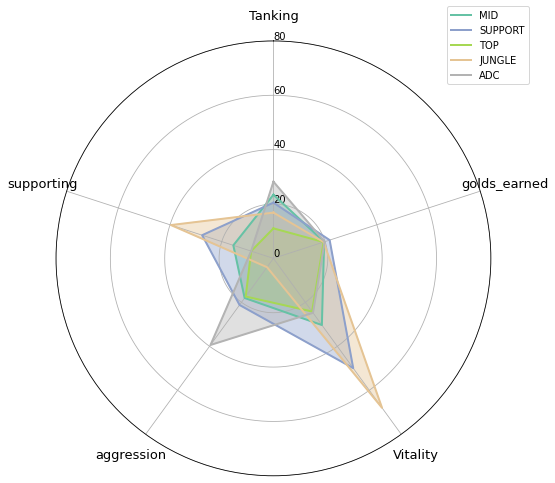

In [ ]:
# 차트 그리기 (아래의 코드를 꼭 한번에 실행해야 함)

# 수치형 데이터만 선택하는 영역
labels = df100.columns[1:]

num_labels = len(labels)    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)]
angles += angles[:1]
my_palette = plt.cm.get_cmap("Set2", len(df100.index))

# 차트의 사이즈 설정
fig = plt.figure(figsize=(8,8))

# 차트의 배경 컬러 설정
fig.set_facecolor('white')

# 차트를 중첩하여 그릴건지 여부
ax = fig.add_subplot(polar=True)

# 반복문 설정 (한명 한명의 데이터를 차트화 하는 과정)
for i, row in df100.iterrows():
    color = my_palette(i)
    # row 단위 데이터 뽑는 부분으로 수치형 데이터에 포함되지 않는 column을 drop을 통해 제거
    data = df100.iloc[i].drop('Playerid').tolist()
    # 위의 결과를 누적하여 저장
    data += data[:1]
    # 우리가 변경할 부분 없음
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    # 디자인 디테일하게 바꾸고 싶을 때
    plt.xticks(angles[:-1], labels, fontsize=13) ## 각도 축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## 각 축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## 반지름 축 눈금 라벨 각도 설정(degree 단위)
    # 눈금에 표시할 수치를 직접 지정
    plt.yticks([0,20,40,60,80],['0','20','40','60','80'], fontsize=10) ## 반지름 축 눈금 설정
    # 눈금의 전체 범위를 지정
    plt.ylim(0,80)
    # 실제 차트를 만드는 부분
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row.Playerid) ## 레이더 차트 출력
    # aplha=0.4 부분이 만들어지는 도형에 칠해지는 색의 opacity (불투명도)입니다.
    ax.fill(angles, data, color=color, alpha=0.4)

# 오른쪽 상단에 그려지는 범례의 위치를 지정하는 부분으로, 굳이 건들필요는 없을 듯 합니다
plt.legend(loc=(0.9,0.9))
plt.show()

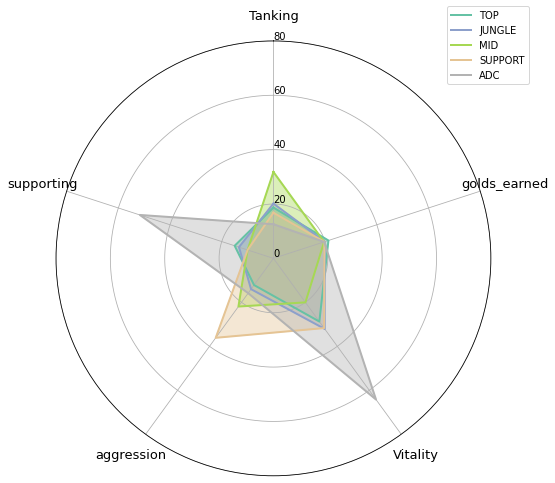

In [ ]:
# 차트 그리기 (아래의 코드를 꼭 한번에 실행해야 함)

# 수치형 데이터만 선택하는 영역
labels = df200.columns[1:]

num_labels = len(labels)    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)]
angles += angles[:1]
my_palette = plt.cm.get_cmap("Set2", len(df200.index))

# 차트의 사이즈 설정
fig = plt.figure(figsize=(8,8))

# 차트의 배경 컬러 설정
fig.set_facecolor('white')

# 차트를 중첩하여 그릴건지 여부
ax = fig.add_subplot(polar=True)

# 반복문 설정 (한명 한명의 데이터를 차트화 하는 과정)
for i, row in df200.iterrows():
    color = my_palette(i)
    # row 단위 데이터 뽑는 부분으로 수치형 데이터에 포함되지 않는 column을 drop을 통해 제거
    data = df200.iloc[i].drop('Playerid').tolist()
    # 위의 결과를 누적하여 저장
    data += data[:1]
    # 우리가 변경할 부분 없음
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    # 디자인 디테일하게 바꾸고 싶을 때
    plt.xticks(angles[:-1], labels, fontsize=13) ## 각도 축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## 각 축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## 반지름 축 눈금 라벨 각도 설정(degree 단위)
    # 눈금에 표시할 수치를 직접 지정
    plt.yticks([0,20,40,60,80],['0','20','40','60','80'], fontsize=10) ## 반지름 축 눈금 설정
    # 눈금의 전체 범위를 지정
    plt.ylim(0,80)
    # 실제 차트를 만드는 부분
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row.Playerid) ## 레이더 차트 출력
    # aplha=0.4 부분이 만들어지는 도형에 칠해지는 색의 opacity (불투명도)입니다.
    ax.fill(angles, data, color=color, alpha=0.4)

# 오른쪽 상단에 그려지는 범례의 위치를 지정하는 부분으로, 굳이 건들필요는 없을 듯 합니다
plt.legend(loc=(0.9,0.9))
plt.show()

## **Carry Rating**

In [ ]:
carry = df1[['position','gameduration','totalkills','stats.assists','stats.totaldamagedealt','stats.totaldamagetaken','stats.kills']]
carry['totalkills'] = df1.groupby(['gameid','teamid'])['stats.kills'].sum()
carry = carry.reset_index(drop=False, inplace=False)
carry = carry.rename(columns = {'stats.totaldamagedealt' : 'damage_dealt','stats.totaldamagetaken' : 'damage_taken','stats.kills':'kills','stats.assists':'assists'})
carry['carry_rating'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for i in range(0, 10) :

    if carry['position'][i] == 'TOP' :
      carry['carry_rating'][i] = (carry['damage_dealt'][i]+carry['damage_taken'][i])/(carry['gameduration'][i])

    elif carry['position'][i] == 'JUNGLE' :
      carry['carry_rating'][i] = (carry['kills'][i]+carry['assists'][i])/(carry['totalkills'][i])
    
    elif carry['position'][i] == 'MID' :
      carry['carry_rating'][i] = (carry['damage_dealt'][i])/(carry['gameduration'][i])

    elif carry['position'][i] == 'ADC' :
      carry['carry_rating'][i] = (carry['damage_dealt'][i])/(carry['gameduration'][i])
     
    else :
      carry['carry_rating'][i] = carry['assists'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from s

In [ ]:
carry_df100 = pd.DataFrame({
'Position': carry['position'][:5],
'carry_rating':carry['carry_rating'][:5]
})

carry_df100

,Position,carry_rating
0,MID,93
1,SUPPORT,4
2,TOP,70
3,JUNGLE,0
4,ADC,98


In [ ]:
carry_df200 = pd.DataFrame({
'Position': carry['position'][5:],
'carry_rating':carry['carry_rating'][5:]
})

carry_df200.reset_index(drop=True,inplace=True)

carry_df200

,Position,carry_rating
0,TOP,76
1,JUNGLE,0
2,MID,68
3,SUPPORT,3
4,ADC,6


In [ ]:
carry = pd.DataFrame({
    'Team': ['Blue', 'Red'],
    'TOP':[70,76],
    "JUNGLE":[40,60],
    'SUPPORT':[60,70],
    'MID':[93,68],
    'ADC':[98,76]
})

carry

,Team,TOP,JUNGLE,SUPPORT,MID,ADC
0,Blue,70,40,60,93,98
1,Red,76,60,70,68,76


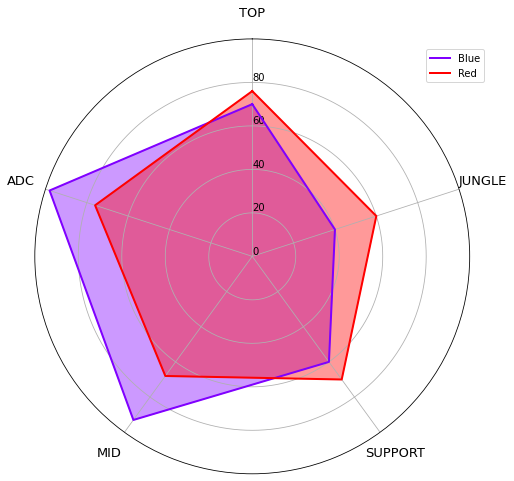

In [ ]:
# 차트 그리기 (아래의 코드를 꼭 한번에 실행해야 함)

# 수치형 데이터만 선택하는 영역
labels = carry.columns[1:]

num_labels = len(labels)    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)]
angles += angles[:1]
my_palette = plt.cm.get_cmap("rainbow", len(carry.index))

# 차트의 사이즈 설정
fig = plt.figure(figsize=(8,8))

# 차트의 배경 컬러 설정
fig.set_facecolor('white')

# 차트를 중첩하여 그릴건지 여부
ax = fig.add_subplot(polar=True)

# 반복문 설정 (한명 한명의 데이터를 차트화 하는 과정)
for i, row in carry.iterrows():
    color = my_palette(i)
    # row 단위 데이터 뽑는 부분으로 수치형 데이터에 포함되지 않는 column을 drop을 통해 제거
    data = carry.iloc[i].drop('Team').tolist()
    # 위의 결과를 누적하여 저장
    data += data[:1]
    # 우리가 변경할 부분 없음
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    # 디자인 디테일하게 바꾸고 싶을 때
    plt.xticks(angles[:-1], labels, fontsize=13) ## 각도 축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## 각 축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## 반지름 축 눈금 라벨 각도 설정(degree 단위)
    # 눈금에 표시할 수치를 직접 지정
    plt.yticks([0,20,40,60,80],['0','20','40','60','80'], fontsize=10) ## 반지름 축 눈금 설정
    # 눈금의 전체 범위를 지정
    plt.ylim(0,100)
    # 실제 차트를 만드는 부분
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row.Team) ## 레이더 차트 출력
    # aplha=0.4 부분이 만들어지는 도형에 칠해지는 색의 opacity (불투명도)입니다.
    ax.fill(angles, data, color=color, alpha=0.4)

# 오른쪽 상단에 그려지는 범례의 위치를 지정하는 부분으로, 굳이 건들필요는 없을 듯 합니다
plt.legend(loc=(0.9,0.9))
plt.show()

# MID Lane Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 5개 지표 설정
categories = ['Golds_earned', 'Tanking', 'Supporting','Aggression','Vitality']
categories = [*categories, categories[0]]

# 데이터 
grade1 = [40,20,50,80,75] # 'Golds_earned', 'Tanking', 'Supporting','Aggression','Vitality'
grade2 = [60,30,40,90,65] # 'Golds_earned', 'Tanking', 'Supporting','Aggression','Vitality'

# grade3 = [83,84,95,63,75]

grade1 = [*grade1, grade1[0]]
grade2 = [*grade2, grade2[0]]
# grade3 = [*grade3, grade3[0]]

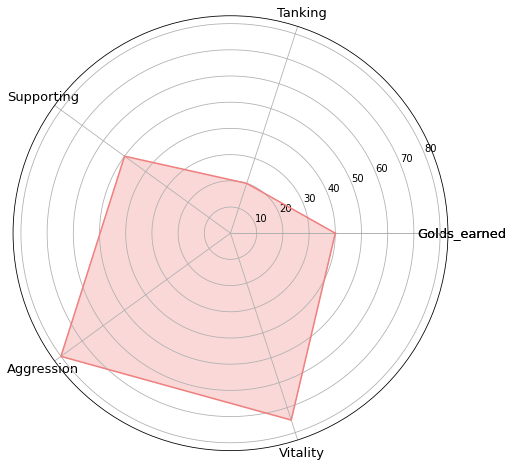

In [ ]:
label_loc = np.linspace(start=0, stop=2*np.pi, num=len(grade1))

plt.figure(figsize=(8,8))
ax = plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories, fontsize=13)

ax.plot(label_loc, grade1, label="Student1",color='lightcoral')
ax.fill(label_loc, grade1, color='lightcoral', alpha=0.3)



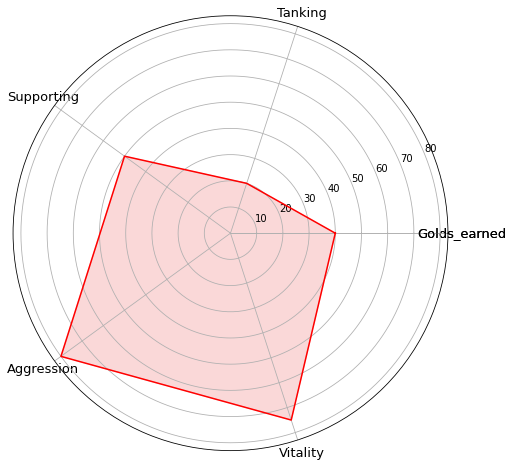

In [ ]:

plt.figure(figsize=(8,8))
ax = plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories, fontsize=13)

ax.plot(label_loc, grade1, label="Student1",color='red')
ax.fill(label_loc, grade1, color='lightcoral', alpha=0.3)



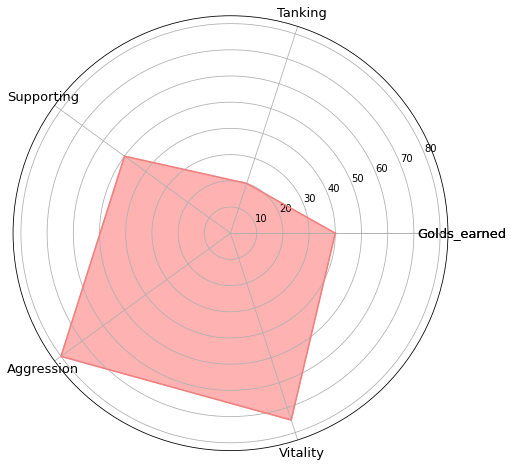

In [ ]:

plt.figure(figsize=(8,8))
ax = plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories, fontsize=13)

ax.plot(label_loc, grade1, label="Student1",color='lightcoral')
ax.fill(label_loc, grade1, color='red', alpha=0.3)



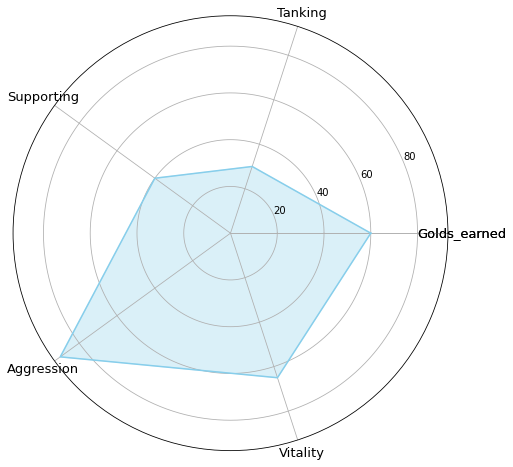

In [ ]:

plt.figure(figsize=(8,8))
ax = plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories, fontsize=13)

ax.plot(label_loc, grade2, label="Student2", color='skyblue')
ax.fill(label_loc, grade2, color='skyblue', alpha=0.3)

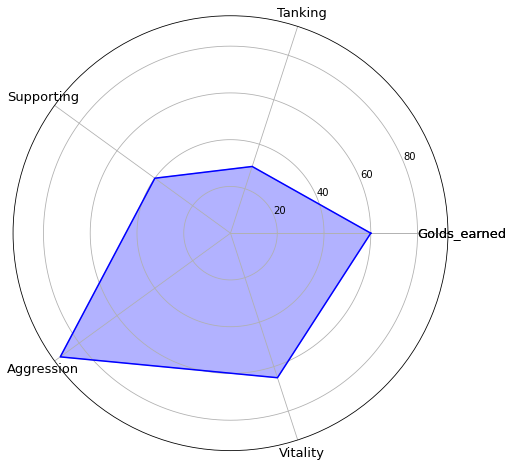

In [ ]:

plt.figure(figsize=(8,8))
ax = plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories, fontsize=13)

ax.plot(label_loc, grade2, label="Student2", color='blue')
ax.fill(label_loc, grade2, color='blue', alpha=0.3)

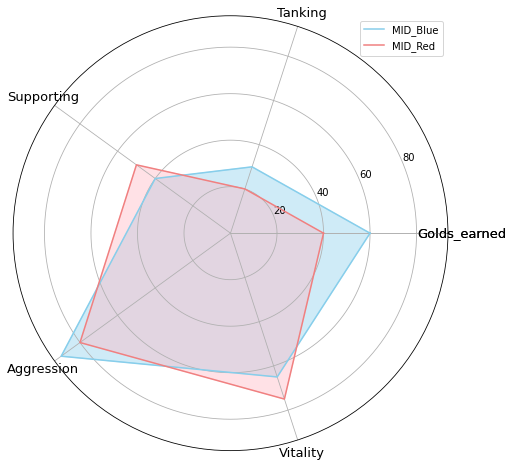

In [ ]:
# 
plt.figure(figsize=(8,8))
ax = plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories, fontsize=13)


ax.plot(label_loc, grade2, label="MID_Blue", linestyle='solid',color='skyblue')
ax.fill(label_loc, grade2, color='skyblue', alpha=0.4)

ax.plot(label_loc, grade1, label="MID_Red",linestyle='solid',color='lightcoral')
ax.fill(label_loc, grade1, color='lightpink', alpha=0.4)


ax.legend()
plt.show();